In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('F:/Data_Trained/Data_set/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# lets check data type of columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df['StandardHours'].value_counts(),df['EmployeeCount'].value_counts()

(80    1470
 Name: StandardHours, dtype: int64, 1    1470
 Name: EmployeeCount, dtype: int64)

In [28]:
#These two columns can be droped

In [7]:
df=df.drop(['StandardHours','EmployeeCount'],axis=1)

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
# lets have some insight of data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# To  find missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [11]:
# No  Null values in the data
df.shape

(1470, 33)

In [12]:
# Lets check correlation
# features in light colors are more correlated
dfcorr=df.corr()
dfcorr

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


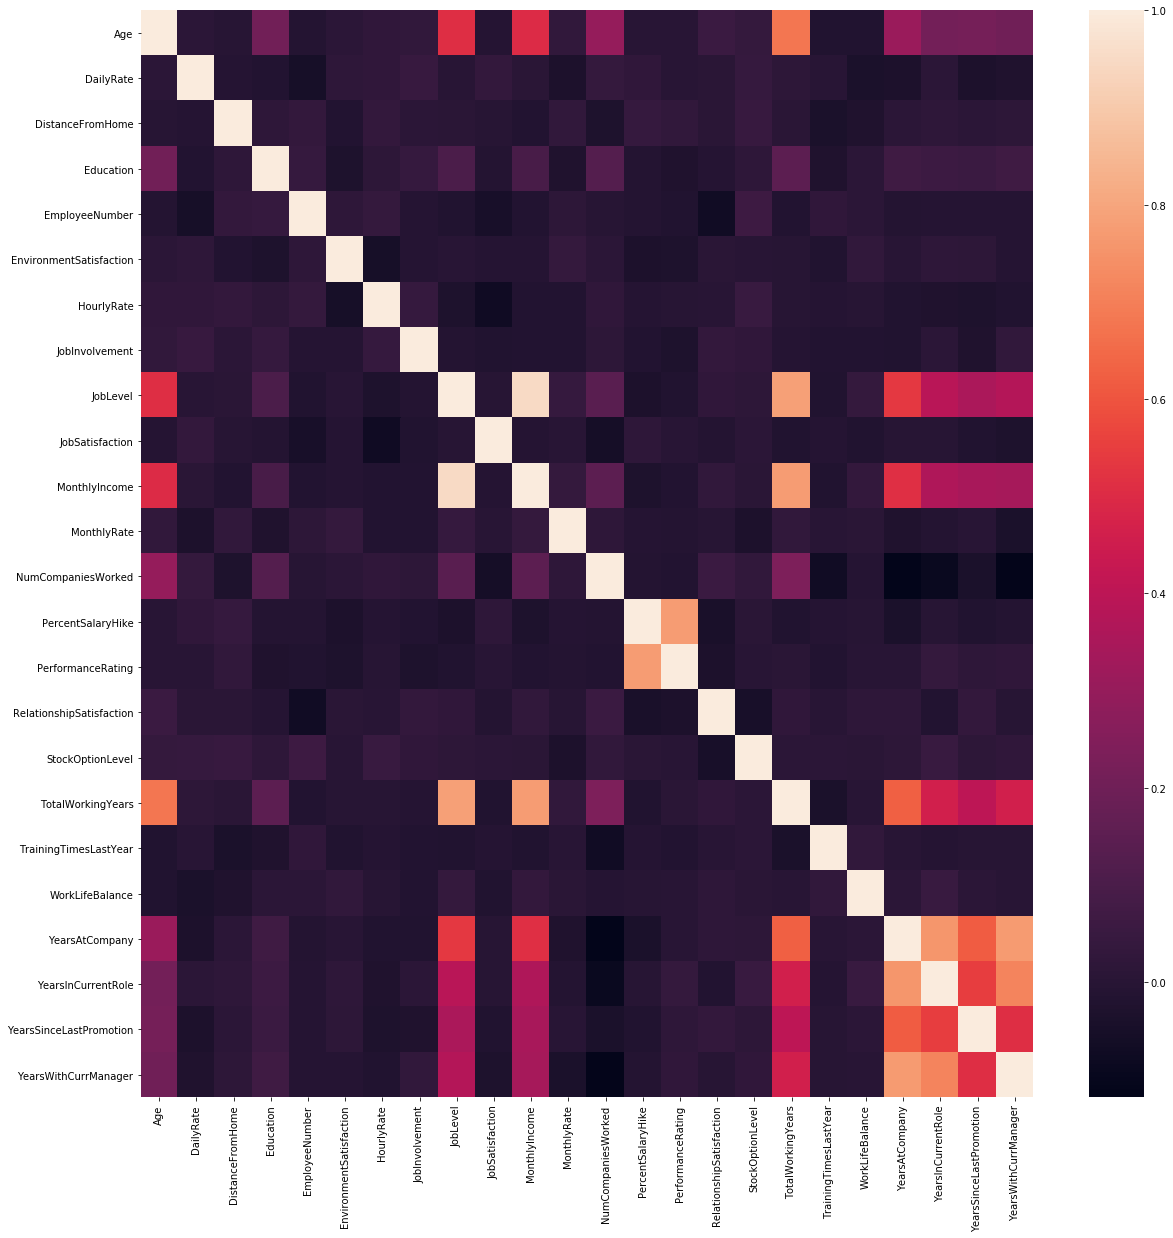

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcorr)


In [41]:
#  majorities of data are poorly coorelated with each other

In [14]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,3,2,2,17,3,2,7,7,7,7


In [ ]:
# lets converte attrition to 0 nd 1

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

In [16]:
df.head() # yes=1 and NO= 0

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [18]:
# Univariate analysis- distribution of average price
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [49]:
# 237 employees have left the company

In [19]:
# lets create dummies for categorical data
df=pd.get_dummies(df)

In [20]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


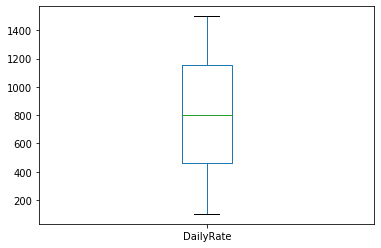

In [21]:
# univarite analysis
df['DailyRate'].plot.box()

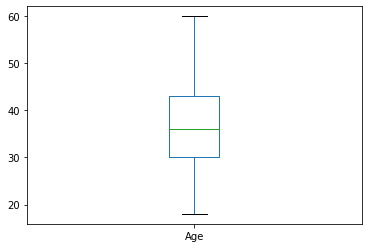

In [22]:
df['Age'].plot.box()

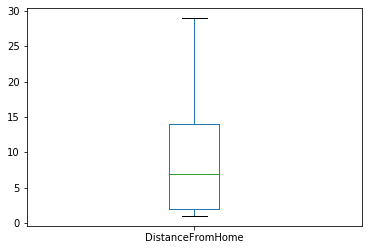

In [23]:
df['DistanceFromHome'].plot.box()

In [140]:
# Looks no outliers present


In [24]:
# lets seperate Target and rest
x=df.drop(columns='Attrition')
y=df['Attrition']

In [25]:
x.shape,y.shape


((1470, 53), (1470,))

In [26]:
# Its a classification case


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
# Finding Best model
lg=LogisticRegression()
max_accuracy_score=0

In [35]:
# Finding best r_state
def maxr2_score(lg,x,y):
    max_accuracy_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lg.fit(x_train,y_train)
        pred=lg.predict(x_test)
        ac_scr=accuracy_score(y_test,pred)
        print('accuracy score corresponding to random state',r_state," is ",ac_scr)
        if ac_scr>max_accuracy_score:
            max_accuracy_score=ac_scr
            final_r_state=r_state
    print('max accuracy score corresponding to ', final_r_state," is ",max_accuracy_score)
    return final_r_state

In [36]:
# Lets use LogisticRegression
r_state=maxr2_score(lg,x,y)

accuracy score corresponding to random state 42  is  0.8673469387755102
accuracy score corresponding to random state 43  is  0.8095238095238095
accuracy score corresponding to random state 44  is  0.8741496598639455
accuracy score corresponding to random state 45  is  0.8163265306122449
accuracy score corresponding to random state 46  is  0.8367346938775511
accuracy score corresponding to random state 47  is  0.8843537414965986
accuracy score corresponding to random state 48  is  0.8741496598639455
accuracy score corresponding to random state 49  is  0.8877551020408163
accuracy score corresponding to random state 50  is  0.8333333333333334
accuracy score corresponding to random state 51  is  0.8945578231292517
accuracy score corresponding to random state 52  is  0.8843537414965986
accuracy score corresponding to random state 53  is  0.8809523809523809
accuracy score corresponding to random state 54  is  0.8673469387755102
accuracy score corresponding to random state 55  is  0.904761904

In [38]:
# To find optimum value of n_neighbours for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsClassifier()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 10}

In [39]:
# Lets use KNN regression model
knr=KNeighborsClassifier(n_neighbors=10)
r_state=maxr2_score(knr,x,y)

accuracy score corresponding to random state 42  is  0.8537414965986394
accuracy score corresponding to random state 43  is  0.7857142857142857
accuracy score corresponding to random state 44  is  0.8503401360544217
accuracy score corresponding to random state 45  is  0.8027210884353742
accuracy score corresponding to random state 46  is  0.8061224489795918
accuracy score corresponding to random state 47  is  0.8299319727891157
accuracy score corresponding to random state 48  is  0.826530612244898
accuracy score corresponding to random state 49  is  0.8367346938775511
accuracy score corresponding to random state 50  is  0.8197278911564626
accuracy score corresponding to random state 51  is  0.8367346938775511
accuracy score corresponding to random state 52  is  0.8571428571428571
accuracy score corresponding to random state 53  is  0.8537414965986394
accuracy score corresponding to random state 54  is  0.8367346938775511
accuracy score corresponding to random state 55  is  0.8741496598

In [45]:
# we will use gradient boosting Technique
# for getting best prameters will use grid search
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [46]:
gcr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gcr,x,y)

accuracy score corresponding to random state 42  is  0.8809523809523809
accuracy score corresponding to random state 43  is  0.8299319727891157
accuracy score corresponding to random state 44  is  0.8673469387755102
accuracy score corresponding to random state 45  is  0.8537414965986394
accuracy score corresponding to random state 46  is  0.8435374149659864
accuracy score corresponding to random state 47  is  0.8605442176870748
accuracy score corresponding to random state 48  is  0.8809523809523809
accuracy score corresponding to random state 49  is  0.8673469387755102
accuracy score corresponding to random state 50  is  0.8401360544217688
accuracy score corresponding to random state 51  is  0.8843537414965986
accuracy score corresponding to random state 52  is  0.8979591836734694
accuracy score corresponding to random state 53  is  0.8639455782312925
accuracy score corresponding to random state 54  is  0.8639455782312925
accuracy score corresponding to random state 55  is  0.867346938

In [47]:
SV=SVC()
DT=DecisionTreeClassifier()
GNB=GaussianNB()

In [50]:
# Use adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_cls=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],'base_estimator':[DecisionTreeClassifier()]}
clf=GridSearchCV(ada_cls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 100}

In [55]:
ada_cls=AdaBoostClassifier(base_estimator=DT,learning_rate=1,n_estimators=100)
r_state=maxr2_score(ada_cls,x,y)

accuracy score corresponding to random state 42  is  0.7619047619047619
accuracy score corresponding to random state 43  is  0.7448979591836735
accuracy score corresponding to random state 44  is  0.7551020408163265
accuracy score corresponding to random state 45  is  0.782312925170068
accuracy score corresponding to random state 46  is  0.7789115646258503
accuracy score corresponding to random state 47  is  0.7993197278911565
accuracy score corresponding to random state 48  is  0.7585034013605442
accuracy score corresponding to random state 49  is  0.7653061224489796
accuracy score corresponding to random state 50  is  0.7619047619047619
accuracy score corresponding to random state 51  is  0.7721088435374149
accuracy score corresponding to random state 52  is  0.7857142857142857
accuracy score corresponding to random state 53  is  0.8095238095238095
accuracy score corresponding to random state 54  is  0.7755102040816326
accuracy score corresponding to random state 55  is  0.8163265306

In [ ]:
# Logistice regression is the best model

In [56]:
#Logistic Regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc_log=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9081632653061225
[[245   1]
 [ 26  22]]


In [58]:
lg_score=cross_val_score(lg,x_train,y_train,cv=5).mean()
lg_score

0.8665047265912754

In [60]:
from sklearn.externals import joblib

In [62]:
joblib.dump(lg,"Attrition_predict.pkl")

['Attrition_predict.pkl']

In [63]:
a=[pred,y_test]

In [64]:
a

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), 971 